# Top Country with Total USD pledged amount in Euros (EUR)

Responsibility: 
Rita Emad

## Imports

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark import SparkContext
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col, avg , sum
import findspark

## Spark

### Start Session

In [39]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("CrowdfundingAnalysis") \
    .getOrCreate()

### Load the data into a Spark Dataframe

In [40]:
crowdfunding_df = spark.read.csv("kick_starter_cleaned.csv", header=True, inferSchema=True)


## Data Preprocessing and Cleaning

### Filtering rows that have more than 3 capital letters

Due to problem with the names that have commas in them.

 Remove entries in currency column with more than exactly 3 capital letters


In [41]:
crowdfunding_df = crowdfunding_df.filter(crowdfunding_df.currency.rlike(r'^[A-Z]{3}$'))

Register the DataFrame as a SQL temporary view

In [42]:
crowdfunding_df.createOrReplaceTempView("kick_starter")

### Countries that use euro currency contribute the most to crowdfunding projects in terms of pledged amounts

In [43]:
result = spark.sql("""
SELECT country, SUM(usd_pledged_real) AS total_pledged
FROM kick_starter
WHERE currency = 'EUR'
GROUP BY currency, country
ORDER BY total_pledged DESC
""")

result.show()

+-------+--------------------+
|country|       total_pledged|
+-------+--------------------+
|     DE|3.9760595309999995E7|
|     FR|        3.43437367E7|
|     NL|2.9242782340000007E7|
|     IT|1.6374247670000006E7|
|     ES|1.2919994580000002E7|
|     AT|          9665788.56|
|     IE|   4187029.790000001|
|     BE|  4181557.5900000003|
|     LU|  468675.66000000003|
+-------+--------------------+



## Data Visualization

### Convert the Spark DataFrame to a Pandas DataFrame

In [44]:
import pandas as pd
import seaborn as sns

In [45]:
result_pd = result.toPandas()

/var/folders/69/mjnnj74d3cj46vt6bgc_tnhc0000gn/T/ipykernel_24584/2156621328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='total_pledged', data=result_pd, palette='viridis')


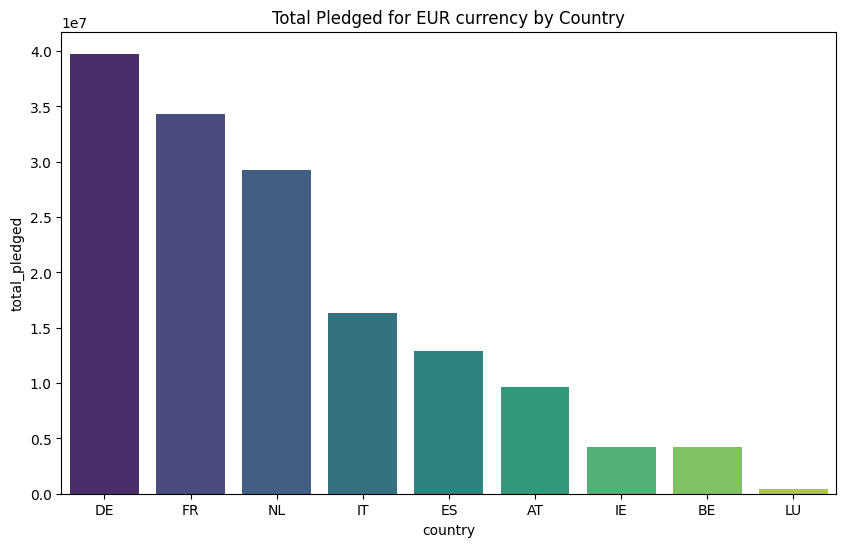

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='total_pledged', data=result_pd, palette='viridis')
plt.title('Total Pledged for EUR currency by Country')
plt.show()